In [40]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.measure import label, regionprops
from sklearn.neighbors import KNeighborsClassifier
# from skimage.morphology import label

In [41]:
img = cv.imread('./aquarium_pretrain/train/images/IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52bb325a0c.jpg')
shape = img.shape
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [42]:
gauss_3x3 = cv.GaussianBlur(gray,(3,3),0,borderType=cv.BORDER_REPLICATE)
cl1 = clahe.apply(gauss_3x3)

fig = plt.figure(figsize =(10, 10)) 

plt.subplot(1, 2, 1)
plt.imshow(gauss_3x3, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(cl1, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem CLAHE')

Text(0.5, 1.0, 'Imagem CLAHE')

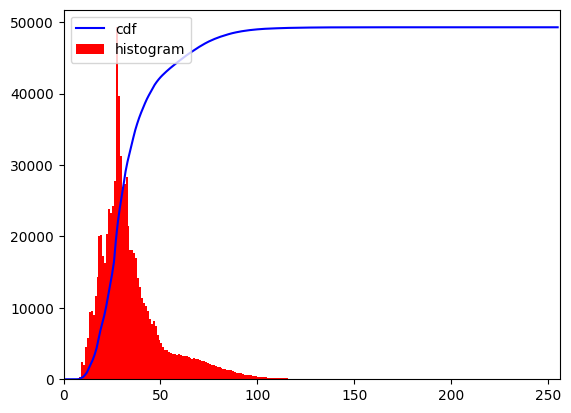

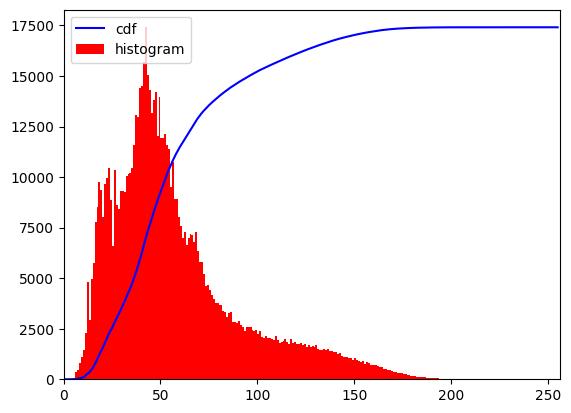

In [43]:
hist,bins = np.histogram(gauss_3x3.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(gauss_3x3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

hist,bins = np.histogram(cl1.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(cl1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Text(0.5, 1.0, 'Imagem Obtida ao aplicar a máscara')

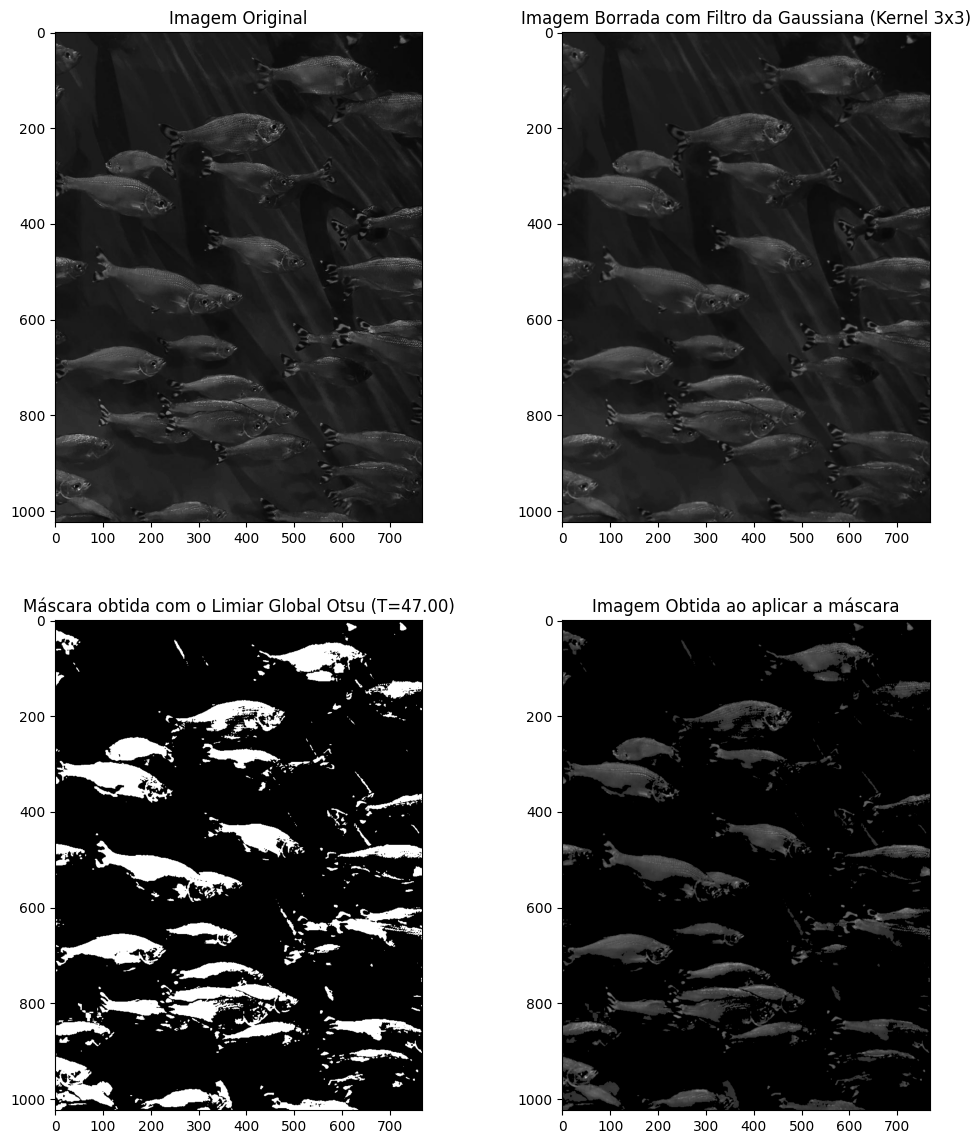

In [44]:
#gauss_3x3 = cv.GaussianBlur(img,(3,3),0,borderType=cv.BORDER_REPLICATE)
ret,thresh1 = cv.threshold(gauss_3x3,185,255,cv.THRESH_OTSU)
result = cv.bitwise_and(gauss_3x3,gauss_3x3,mask = thresh1)
#result = cv.medianBlur(result,3)
#result = cv.GaussianBlur(result,(3,3),0,borderType=cv.BORDER_REPLICATE)

fig = plt.figure(figsize =(12, 14)) 

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.subplot(2, 2, 2)
plt.imshow(gauss_3x3, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Borrada com Filtro da Gaussiana (Kernel 3x3)')

plt.subplot(2, 2, 3)
plt.imshow(thresh1, cmap='gray', vmin=0, vmax=255)
plt.title('Máscara obtida com o Limiar Global Otsu (T=%1.2f)' % ret)

plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Obtida ao aplicar a máscara')

Text(0.5, 1.0, 'Máscara Final')

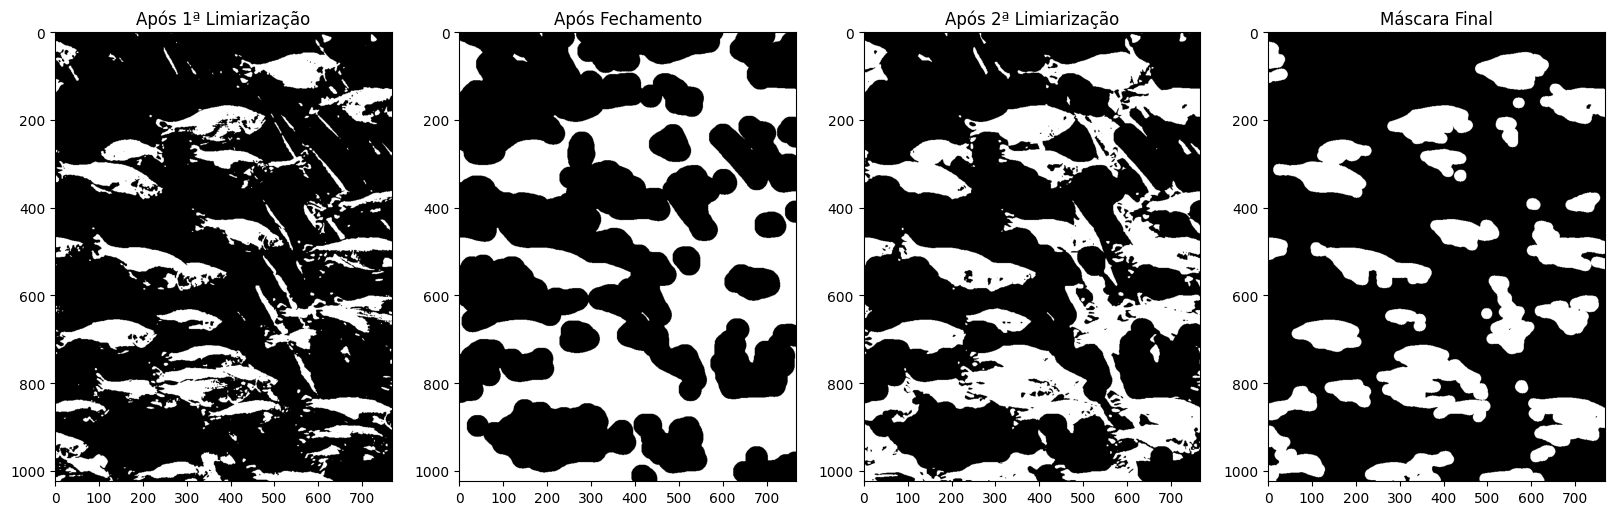

In [45]:
blured1 = cv.GaussianBlur(cl1,(3,3),0,borderType=cv.BORDER_REPLICATE)
ret,mask1 = cv.threshold(blured1,0,255,cv.THRESH_OTSU)
kernel1 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(50,50))
closed = cv.morphologyEx(mask1, cv.MORPH_CLOSE, kernel1)
combined = cv.bitwise_and(blured1,blured1,mask = closed)
blured2 = cv.GaussianBlur(combined,(3,3),0,borderType=cv.BORDER_REPLICATE)
ret,mask2 = cv.threshold(blured2,0,255,cv.THRESH_OTSU)
kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,5))
kernel3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(25,25))
mask3 = cv.morphologyEx(mask2, cv.MORPH_OPEN, kernel2)
final_mask = cv.morphologyEx(mask3, cv.MORPH_OPEN, kernel3)

fig = plt.figure(figsize =(20, 14)) 

plt.subplot(1, 4, 1)
plt.imshow(mask1, cmap='gray', vmin=0, vmax=255)
plt.title('Após 1ª Limiarização')

plt.subplot(1, 4, 2)
plt.imshow(closed, cmap='gray', vmin=0, vmax=255)
plt.title('Após Fechamento')

plt.subplot(1, 4, 3)
plt.imshow(mask2, cmap='gray', vmin=0, vmax=255)
plt.title('Após 2ª Limiarização')

plt.subplot(1, 4, 4)
plt.imshow(final_mask, cmap='gray', vmin=0, vmax=255)
plt.title('Máscara Final')

Text(0.5, 1.0, 'Imagem Obtida ao aplicar a máscara')

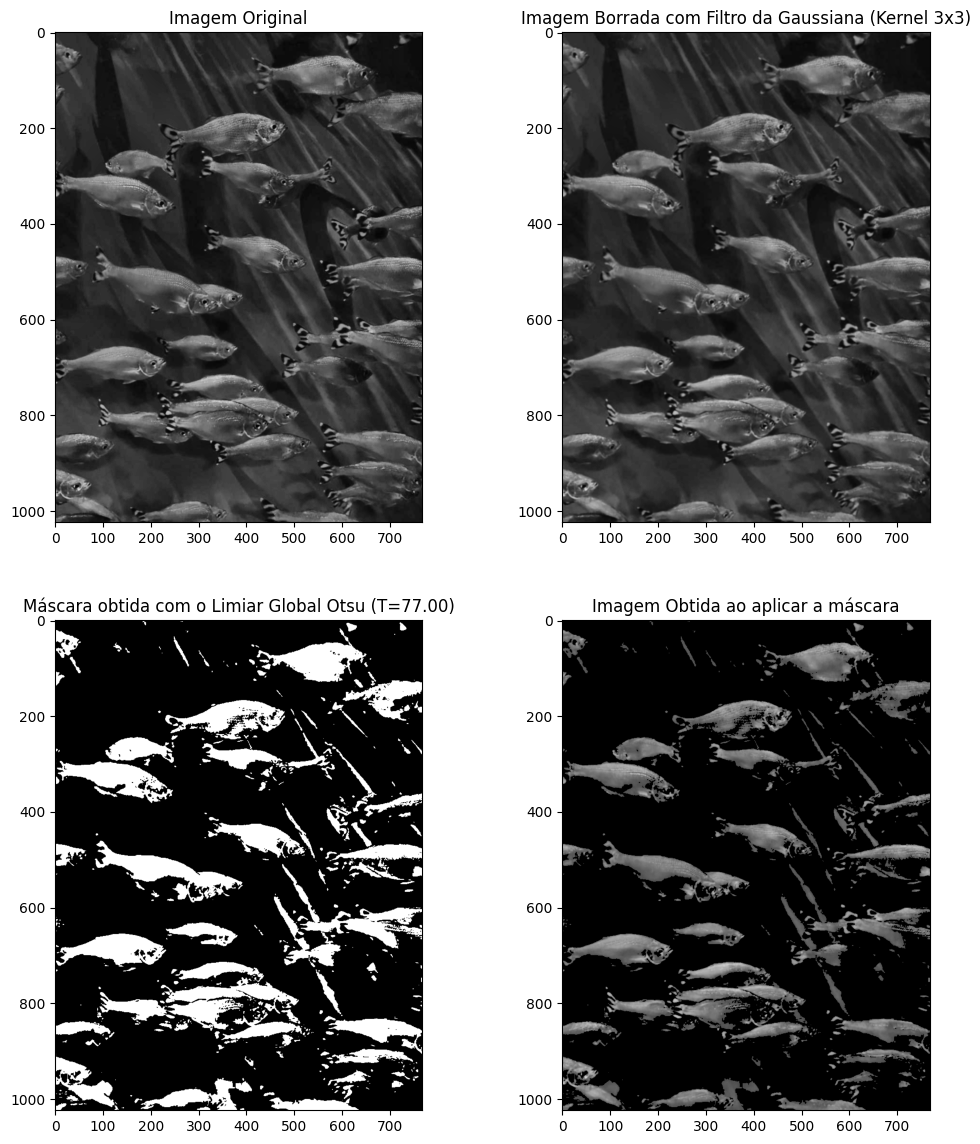

In [46]:
gauss_3x3 = cv.GaussianBlur(cl1,(3,3),0,borderType=cv.BORDER_REPLICATE)
ret,thresh1 = cv.threshold(cl1,185,255,cv.THRESH_OTSU)
result = cv.bitwise_and(gauss_3x3,gauss_3x3,mask = thresh1)
#result = cv.medianBlur(result,3)
#result = cv.GaussianBlur(result,(3,3),0,borderType=cv.BORDER_REPLICATE)

fig = plt.figure(figsize =(12, 14)) 

plt.subplot(2, 2, 1)
plt.imshow(cl1, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.subplot(2, 2, 2)
plt.imshow(gauss_3x3, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Borrada com Filtro da Gaussiana (Kernel 3x3)')

plt.subplot(2, 2, 3)
plt.imshow(thresh1, cmap='gray', vmin=0, vmax=255)
plt.title('Máscara obtida com o Limiar Global Otsu (T=%1.2f)' % ret)

plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Obtida ao aplicar a máscara')

Text(0.5, 1.0, 'Imagem após o Fechamento (Kernel Elíptico 31x31)')

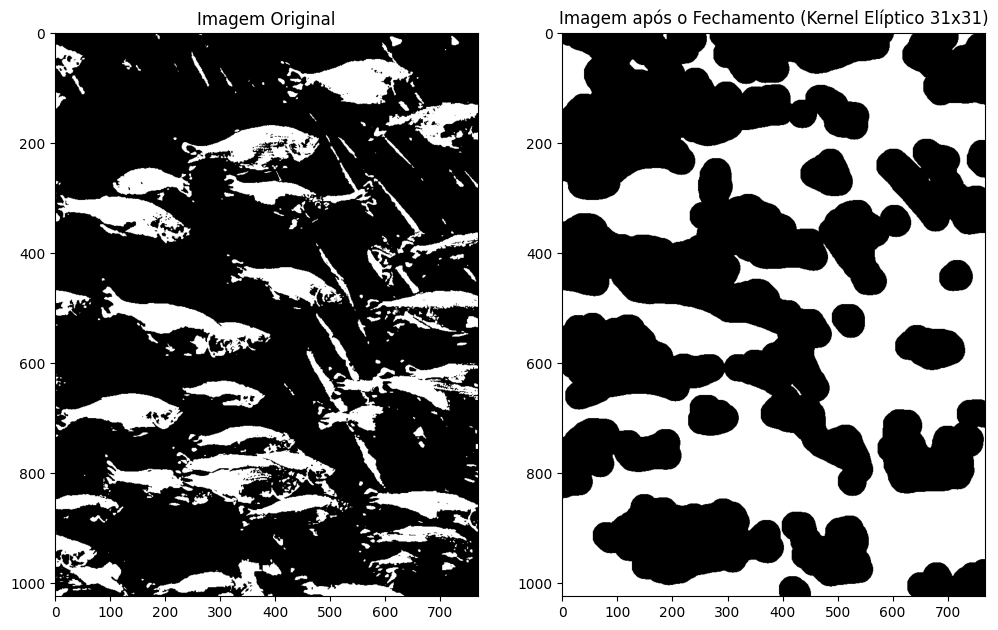

In [47]:
image = thresh1

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(50,50))
img_erosion = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)

fig = plt.figure(figsize =(12,10)) 

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(img_erosion, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem após o Fechamento (Kernel Elíptico 31x31)')

In [48]:
result = cv.bitwise_and(gauss_3x3,gauss_3x3,mask = img_erosion)
gauss_3x3 = cv.GaussianBlur(result,(3,3),0,borderType=cv.BORDER_REPLICATE)
ret,thresh1 = cv.threshold(result,80,255,cv.THRESH_OTSU)
result = cv.bitwise_and(gauss_3x3,gauss_3x3,mask = thresh1)
#result = cv.medianBlur(result,3)
#result = cv.GaussianBlur(result,(3,3),0,borderType=cv.BORDER_REPLICATE)

fig = plt.figure(figsize =(12, 14)) 

plt.subplot(2, 2, 1)
plt.imshow(cl1, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.subplot(2, 2, 2)
plt.imshow(gauss_3x3, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Borrada com Filtro da Gaussiana (Kernel 3x3)')

plt.subplot(2, 2, 3)
plt.imshow(thresh1, cmap='gray', vmin=0, vmax=255)
plt.title('Máscara obtida com o Limiar Global Otsu (T=%1.2f)' % ret)

plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Obtida ao aplicar a máscara')

Text(0.5, 1.0, 'Imagem Obtida ao aplicar a máscara')

Text(0.5, 1.0, 'Imagem após o Fechamento (Kernel Elíptico 31x31)')

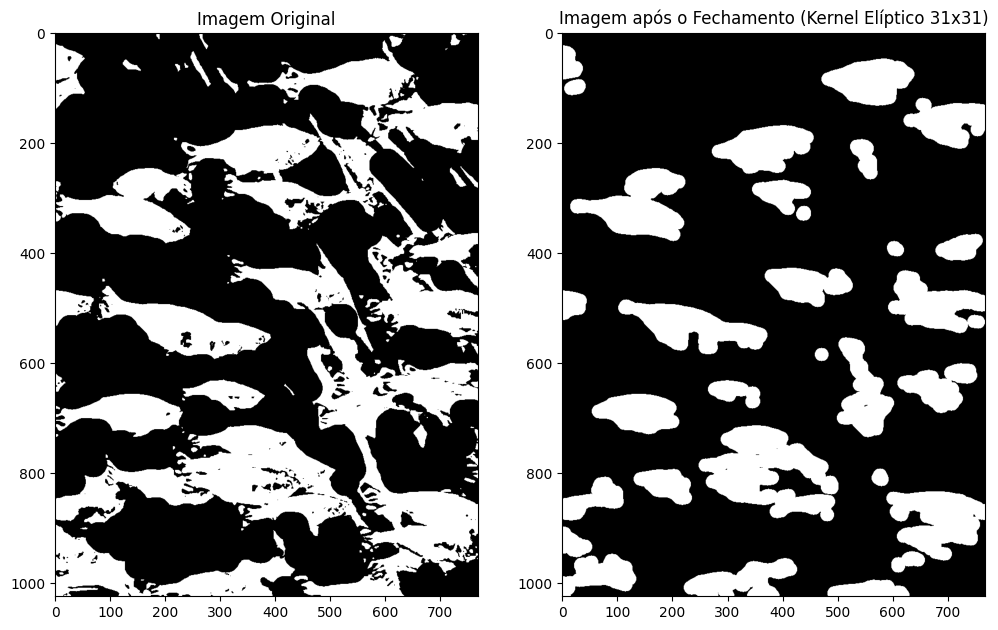

In [49]:
image = thresh1

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,5))
kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(25,25))
img_erosion = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
img_erosion = cv.morphologyEx(img_erosion, cv.MORPH_OPEN, kernel2)

fig = plt.figure(figsize =(12,10)) 

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(img_erosion, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem após o Fechamento (Kernel Elíptico 31x31)')

In [50]:
def aumentar_bounding_box(imagem, bbox, fator_aumento):
    """
    Aumenta o tamanho da bounding box mantendo o centro e sem sair da imagem.

    :param imagem: A imagem onde a bounding box será aumentada.
    :param bbox: A bounding box original como uma tupla (x1, y1, x2, y2).
    :param fator_aumento: O fator pelo qual a bounding box será aumentada (exemplo: 1.2 para aumentar 20%).
    :return: A nova bounding box ajustada.
    """
    altura_imagem, largura_imagem = imagem.shape
    
    # Calculando o centro da bounding box
    x1, y1, x2, y2 = bbox
    cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
    
    # Calculando a largura e altura da bounding box
    largura = x2 - x1
    altura = y2 - y1
    
    # Aumentando a largura e altura da bounding box
    nova_largura = largura * fator_aumento
    nova_altura = altura * fator_aumento
    
    # Calculando as novas coordenadas da bounding box
    novo_x1 = int(max(0, cx - nova_largura / 2))
    novo_y1 = int(max(0, cy - nova_altura / 2))
    novo_x2 = int(min(largura_imagem, cx + nova_largura / 2))
    novo_y2 = int(min(altura_imagem, cy + nova_altura / 2))
    
    # Retornando a nova bounding box
    return novo_x1, novo_y1, novo_x2, novo_y2

In [51]:
def get_iou(bb1, bb2):
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left + 1) * (y_bottom - y_top + 1)

    bb1_area = (bb1[2] - bb1[0] + 1) * (bb1[3] - bb1[1] + 1)
    bb2_area = (bb2[2] - bb2[0] + 1) * (bb2[3] - bb2[1] + 1)
    
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [52]:
h, w = shape[0], shape[1]
box_list_right = []
test = cv.GaussianBlur(img,(3,3),0,borderType=cv.BORDER_REPLICATE)

with open("./aquarium_pretrain/train/labels/IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52bb325a0c.txt", "r") as file1:
    for line in file1.readlines():
        class_id, x_center, y_center, width, height = map(float, line.split())
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)
        box = (x_min, y_min, x_max, y_max)
        box_list_right.append(box)

for box in box_list_right:
    cv.rectangle(test, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

fig = plt.figure(figsize =(8, 8)) 

plt.subplot(1, 1, 1)
plt.imshow(test, vmin=0, vmax=255)
plt.title('Imagem Original')

Text(0.5, 1.0, 'Imagem Original')

In [53]:
mask_0 = img_erosion
mask_1 = cv.GaussianBlur(img,(3,3),0,borderType=cv.BORDER_REPLICATE)
lbl_0 = label(mask_0) 
props = regionprops(lbl_0)
box_list_found = []
for prop in props:
    #print('Found bbox', prop.bbox)
    box = (prop.bbox[1], prop.bbox[0], prop.bbox[3], prop.bbox[2])
    box = aumentar_bounding_box(img_erosion, box, 1.2)
    box_list_found.append(box)
    cv.rectangle(mask_1, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)

fig = plt.figure(figsize =(8, 8)) 

plt.subplot(1, 1, 1)
plt.imshow(mask_1, vmin=0, vmax=255)
plt.title('Imagem Original')

Text(0.5, 1.0, 'Imagem Original')

In [54]:
box_list_found = np.array(box_list_found)
box_list_right = np.array(box_list_right)
classes = np.arange(len(box_list_right))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(box_list_right, y=classes)
matches = knn.predict(box_list_found)

In [55]:
lf_size, lr_size = len(box_list_found), len(box_list_right)
total = 0
for i in range(lf_size):
    j = matches[i]
    current = get_iou(box_list_found[i], box_list_right[j])
    total += current/lf_size
    #print(current)
mod = (lr_size-abs(lr_size-lf_size))/lr_size
total *= 100*mod
print("Acurácia para essa imagem foi de: {:.2f}%".format(total))

Acurácia para essa imagem foi de: 38.80%
